# Data Analyst Project 2
Analyzing the NYC Subway Dataset for Dependencies Between Weather Data and Subway Ridership 

_by Benjamin Söllner, benjamin.soellner@gmail.com_

_based on the Udacity.com Intro To Data Science Course_

<img src="weather_turnstile.png" alt="Illustration of a Weather Turnstile" width="401" height="344" style="display: inline; margin: 6pt;" />

## Preface
This report is provided as a Python Notebook which is part of a GitHub repository containing this course's code completed with my personal solutions. The (runnable) code segments in this notebook generate output which is discussed in this report. For certain discussions, it might be beneficial to the reader's understanding to look at the code side-by-side with this report. 

How to find the relevant code in the GitHub repository?: The import statements at the top of each code fragments guide you to the corresponding solution, i.e. the following line

````python
from project_a.topic.file import f
````

would reference the file ```project_a/topic/file.py```, and more precisely, function ```f(...)```, in the GitHub repository. Note, how this also ties nicely into this course's structure and guides you directly to the respective ```topic``` in the ```project_a``` part of the Intro To Data Science Course.

## 0. References
There were two forum posts which helped me out very much during this project:
- [Problem Set 4 / Visualization: Swap Axis & Bar Chart with two Data Rows](https://discussions.udacity.com/t/problem-set-4-visualization-swap-axis-bar-chart-with-two-data-rows/26999)
- [Problem Set 4.1: Visualization of Categorical Data, Weekdays etc](https://discussions.udacity.com/t/problem-set-4-1-visualization-of-categorical-data-weekdays-etc/26296)

The first forum post / problem could only be solved after a coach appointment with Carl, who swiftly me with this [Gist code snippet](https://gist.github.com/anonymous/dde72c69eec66a94975b).

Additionally, here are a few more useful references:
- [Building python packages and modules in a file system structure](http://stackoverflow.com/questions/1260792/python-import-a-file-from-a-subdirectory)
- [Python documentation about modules and packages](https://docs.python.org/2/tutorial/modules.html)
- [Python datetime reference](https://docs.python.org/2/library/datetime.html)
- [Pandas DataFrame reference](http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe)
- [Pandas Series reference](http://pandas.pydata.org/pandas-docs/stable/api.html#series)
- [Sorting Pandas DataFrame and printing highest values](http://stackoverflow.com/questions/16958499/sort-pandas-dataframe-and-print-highest-n-values)
- [ggplot yhatq geom_bar API Examples / sparsely documented API reference](http://ggplot.yhathq.com/docs/geom_bar.html)
- [ggplot from yhatq Tutorial blog](http://blog.yhathq.com/posts/ggplot-for-python.html)
- [Setting limits for axis in ggplot](http://stackoverflow.com/questions/3606697/how-to-set-limits-for-axes-in-ggplot2-r-plots) - instead of ```c(...,...)``` use ```[..., ...]```
- [Resetting index on DataFrames](http://stackoverflow.com/questions/16167829/in-pandas-how-can-i-reset-index-without-adding-a-new-column)
- [Adjusting positions by dodging bar plots to the side in ggplot2 - doesn't work in ggplot, however.](http://docs.ggplot2.org/0.9.3.1/position_dodge.html)
- [Bar Plots with stacked series in RPy - doesn't work in ggplot, however.](http://stackoverflow.com/questions/17644471/ordering-ggplot2-bars-with-flipped-coordinates-using-rpy2-in-python)
- [Flipping x in y axis in ggplot2 - doesn't work in ggplot, however.](http://stackoverflow.com/questions/11466131/ggplot-geom-bar-rotate-and-flip)
- [Getting started with statsmodel](http://statsmodels.sourceforge.net/stable/gettingstarted.html)
- [Understanding Multicollinearity in Linear Regression WebCast](https://plus.google.com/u/0/events/c8khim7rtq14nlhk7kevasthvis?authkey=CMXj4cmGlNKc0QE) - [Forum Entry](https://discussions.udacity.com/t/webcast-multicollinearity-in-linear-regression-tuesday-16th-june-at-5pm-pacific-time/21994), [Python Notebook](http://nbviewer.ipython.org/gist/charlie-turner/b08430d783c8c9435a72/)
- [Predicting Values from a OLS Model Using Statsmodel](http://stackoverflow.com/questions/13218461/predicting-values-using-an-ols-model-with-statsmodels)
- [How to Interpret R² Values](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

## 1. Statistical Test
As a statistical test, a **Mann-Whitney-U-Test** has been performed in **Problem 3.3** of this course to find out whether more people ride the subway when it is raining vs. when it is not raining. The following code returns the results of this test in the following format:

    (mean_with_rain, mean_without_rain, U, p)

In [4]:
from project_3.mann_whitney_u_test.mann_whitney_u import mann_whitney_plus_means
import pandas as pd

input_filename = "project_3/mann_whitney_u_test/turnstile_data_master_with_weather.csv"
turnstile_master = pd.read_csv(input_filename)
print mann_whitney_plus_means(turnstile_master)

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.019309634413792565)


### Methodology / Applicability (1.1, 1.2)
The **Mann-Whitney-U-Test** is applied to data that is **non-normal**. Based on the histograms shown in [Section 3, Visualization 1](#Visualization-1:-Histogram-of-Hourly-Riders-on-Rainy-vs.-Not-Rainy-Days), we can assume that the average number of subway riders per day is non-normally distributed (both for the subset of the data for rainy days vs. the subset of the data for non-rainy days). The Mann-Whitney-U-Test per definition is **one-tailed**.

Our **Null-Hypothesis** in our case is: "There is no significant difference between the daily average rides per hour on rainy vs. on non-rainy days". We choose $\alpha = p_\text{critical} = 0.05$.

### Results /  Significance / Interpretation (1.3, 1.4)
The test results above give us a $p = 0.0193$ with the sample means $\bar{x}_\text{rain} = 1105.44 \frac{\text{rides}}{\text{hour}}$ and $\bar{x}_\text{norain} = 1090.2788 \frac{\text{rides}}{\text{hour}}$. Based on the p-Value and our previously chosen $p_\text{critical}$ we can **reject the Null-Hypothesis**. 

Therefore, there is a significant difference between the daily average rides per hour on rainy days vs. on non-rainy days: the number of people riding the subway is significantly larger ($p_\text{critical} = 0.05$) on rainy vs. on non-rainy days.

## 2. Regression
The most promising Regression Model could be calculated using the Library **statsmodel** (see [References](#0.-References)) and the improved dataset which was provided for this project. Therefore, the following code must be run from the code solution provided in the GitHub repository and <u>cannot</u> be found on the website as part of my quiz submissions.

In [1]:
from project_3.other_linear_regressions.advanced_linear_regressions import predictions
import pandas as pd

input_filename = "project_3/other_linear_regressions/turnstile_weather_v2.csv"
turnstile_master = pd.read_csv(input_filename)
predictions(turnstile_master)

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     182.2
Date:                Thu, 30 Jul 2015   Prob (F-statistic):               0.00
Time:                        02:15:26   Log-Likelihood:            -3.8530e+05
No. Observations:               42649   AIC:                         7.711e+05
Df Residuals:                   42388   BIC:                         7.734e+05
Df Model:                         260                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
const                    681

array([ -778.42172231, -2201.67405866,  -155.91380219, ...,   690.14905763,
         845.2340505 ,  1417.04774007])

### Approach (2.1)
I chose to use a non-linear model with a regression based on **Ordinary Least Squares** implemented using statsmodel. In particular, in preparing my feature matrix (```features```) I use the same method I would use for a simple linear model. The only difference - marked below by (\*) - is, I will be adding additional columns to the matrix for those features not described by one coefficient ($a X$) but by a polynom ($a_1 X + a_2 X^2 + ... + a_g X^G$) instead. 

The Data Frame ```features``` is computed as follows:

1. Start with the Data Frame of the CSV data reduced to the columns containing only the chosen features.
2. Handle the numerical features:
  - Normalize them
  - (\*) For all features that need to be threated as a non-linear / polynomial term: With $g$ being the chosen grade (= highest exponent) of the polynomial term, add $g-1$ Pandas Series to the dataframe with each frame representing one of the higher powers of the feature starting from $2$ leading up to $g$.
3. Handle the categorical features: For each categorical feature, create a Pandas Data Frame of dummy variables, drop the last Pandas Series to eliminate collinearity, then join the Data Frame of dummy variables with the original Data Frame.
4. Add a constant term as an additional column to the Data Frame.

We then prepare another Data Frame ```values``` only containing the one column with the response variable. With both variables in place, we can easily use the ```statsmodels.api``` (```sm```) to calculate the model, fit it to the dataset and calculate the predicted values of the features (```prediction```).

````python
result = sm.OLS(values, features).fit()
prediction = result.predict(features)
print result.summary()
````

### Chosen Features / Coefficients (2.2, 2.3, 2.4)
The following features were systematically chosen for the regression model:
- **Hour of day** (```hour```) was chosen as a polynomial term with grade 4 and 4 coefficients respectively ($a_1 X + a_2 X^2 + a_3 X^3 + a_4 X^4$). My intuition was, that there would be three extrema in the ridership of subways: a climb to a maximum in the morning-rush-hour, a minimum during the day and another maximum in the evening-rush-hour.
- **Mean Temperature** (```meantempi```) was chosen as a 2 grade polynomial term ($a_1 X + a_2 X^2$) because of the assumption, that there is a minimum, where less people take the subway - when the temperature is just right to be outside. If it's too cold or too hot, people might use the subway more often. This model yielded a higher $R^2$ value than a simple linear term.
- **Mean Precipitation** (```meanprecipi```) as a linear term with the assumption that people take the subway more often when it rains.
- **Mean Pressure** (```meanpressurei```) as a linear term guessing that high pressure weather conditions (generally nicer weather) means, people might decide to stay out more.
- **Mean Windspeed** (```meanwindspdi```) as a linear term assuming that storms make people take the subway more often.
- **Weekend or not** (```is_weekend```) as a linear / quasi-categorical term assuming that there is a significant difference between the number of people taking the subway on weekends vs. on other days.
- **Weather Conditions** (```conds```) as a (linear) categorical term using dummy variables, assuming that there is a significant difference in the number of people taking the subway during different weather conditions
- **Turnstile Unit** (```UNIT```) as a (linear) categorical term using dummy variables, assuming that there is a more complex significant difference between the riderships on different subway stations. This might overfit the model with little possibilities to add additional subway stations (see [Conclusion](#4.-Conclusion)). I decided to use this term anyway since using "latitude & longitude" instead, even as polynomial term, I only got to about $R^2 = 28.0$.

The **Coefficients** (or Parameters, Weights) can be found in the program output above in the ```coeff``` column.

### $R^2$ & Interpretation of $R^2$ (2.5 & 2.6)
With $R^2 = 0.528$, we do have a rather high value compared to $R^2 = 0.40$ from Problem Set 3. $R^2$ indicates, how much of the total variability in the dataset is explained by our model, which would be about 52%. For a model representing human behaviour solely on based on time of day, weekend/non-weekend and weather, this is a reasonable value for $R^2$.

It should be noted, that $R^2$ does not signify, whether our model is **overfitted / biased** (and might therefore not represent data outside the dataset). Therefore, additional tests would be required with a learning and a training set.

$R^2$ also does not explain **Goodness-of-fit**. To asess this, we would have to compare individual predicted values with values from the dataset to look for potential systematic over- or underpredictions in the dataset.

## 3. Visualization
Visualizations were created during the **Problem Set 4** of the courses. The following sections reference the code which was created to get a few visualization and, moving on, describe them in detail according to the questions from the project rubric:

### Visualization 1: Histogram of Hourly Riders on Rainy vs. Not-Rainy Days
The following visualization is drawn from **Problem 3.1** and shows a histogram of hourly rides on rainy (green) vs. non-rainy (blue) days. Depicted are the number of days (y-axis) when the hourly average number of subway rides are falling within a specific range (x-axis).

<module 'matplotlib.pyplot' from 'C:\Unmanaged Programs\Anaconda\lib\site-packages\matplotlib\pyplot.pyc'>


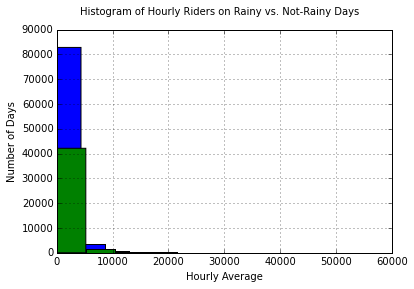

In [1]:
%matplotlib inline
from project_3.plot_histogram.plot_histogram import entries_histogram
import pandas as pd
from ggplot import * 

turnstile_weather = pd.read_csv("project_3/plot_histogram/turnstile_data_master_with_weather.csv")
plt = entries_histogram(turnstile_weather)
print plt

#### Interpretation
We can see a non-normal distribution of the data. For non-rainy days, there are more days with a lower hourly average than for rainy days.

### Visualization 2: Subway Entries by Day of Week
The next visualization is taken from **Problem 4.1** and shows the average number of subway entries per hour (y-axis) for each weekday (x-axis).

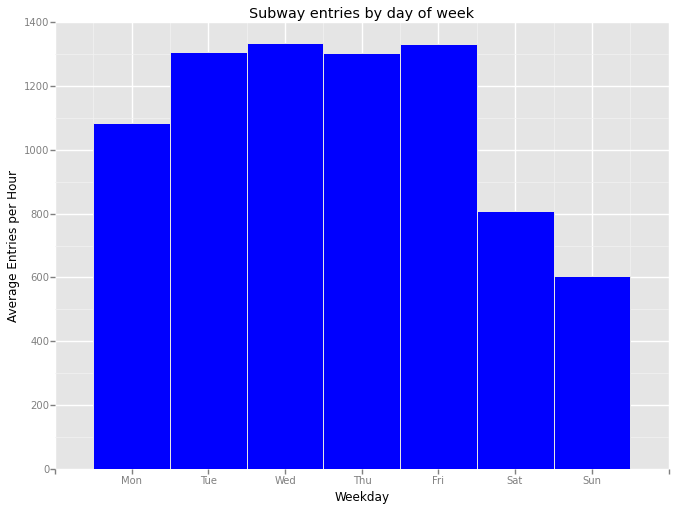

<ggplot: (32947260)>


In [1]:
%matplotlib inline
from project_4.exercise_1.data_visualization import plot_weather_data
import pandas as pd
from ggplot import * 

turnstile_weather = pd.read_csv("project_4/exercise_1/turnstile_data_master_with_weather.csv")
turnstile_weather['datetime'] = turnstile_weather['DATEn'] + ' ' + turnstile_weather['TIMEn']
gg =  plot_weather_data(turnstile_weather)
print gg

#### Interpretation
There are much fewer subway rides (entries) on weekends (Saturday and Sunday) than on working days with Monday beeing the working day where least people enter the subway.

### Visualization 3: 10 Stations With the Lowest & Highest Number of Entries vs. Exits
The last visualization is taken from **Problem 4.2** and shows the ratio between entries & exits on various stations. Depicted are only the first 10 and the last 10 stations where that ratio is smallest and biggest, respectively. The y-axis is cut at 100 since unit "R070" has a much higher ratio than all the other units. The output of the program code below also shows the raw data as print-out.

    index  UNIT  EXITSn_hourly  ENTRIESn_hourly         ratio
0     325  R338     112.908571        25.508571      0.225922
1     439  R454     710.897590       178.054217      0.250464
2     440  R455     437.702381       141.119048      0.322409
3     323  R336     323.753086       114.061728      0.352311
4      40  R042    1760.792350       682.508197      0.387614
5     441  R456     598.080214       267.582888      0.447403
6     251  R263     300.174129       176.049751      0.586492
7      12  R013    3871.911458      2491.994792      0.643608
8      30  R032    6020.570681      4144.047120      0.688315
9     403  R418      49.386364        37.068182      0.750575
10    304  R317     142.268156       753.363128      5.295374
11    391  R405     130.713483       750.196629      5.739244
12    293  R306      39.723757       327.276243      8.238804
13    328  R341      58.861878       531.270718      9.025718
14    331  R344      24.304878       510.274390     20.994732
15    44

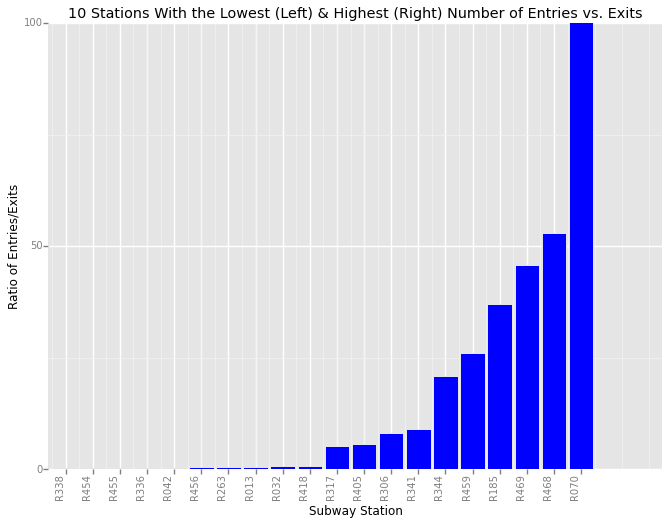

<ggplot: (29660315)>


In [1]:
%matplotlib inline
from project_4.exercise_2.data_visualization import plot_weather_data
import pandas as pd
from ggplot import * 

turnstile_weather = pd.read_csv("project_4/exercise_2/turnstile_data_master_with_weather.csv")
turnstile_weather['datetime'] = turnstile_weather['DATEn'] + ' ' + turnstile_weather['TIMEn']
gg =  plot_weather_data(turnstile_weather)
print gg

#### Interpretation 
The 3 stations with the most exits (vs. entries) are:

1. [R338 - Beach 36 St][R338] - A beachy station close to Rockaway Park on Long Island
2. [R454 - Prospect Ave in Brooklyn][R454] - A major junction on the Brooklyn riverside
3. [R455 - 25 St in Brooklyn][R455] - A station just south of Prospect Ave

The 3 stations with the most entries (vs. exits) are:

1. [R070 - St Georges on Staten Island][R070] - the station on the banks of Staten Island (the "overwhelming" winner)
2. [R468 - Roosevelt Island Tram - Manhattan Side][R468]
3. [R469 - Roosevelt Island Tram - Roosevelt Island Side][R469]

The last two items hint at a data error: since the Roosevelt Island Tram consists only of two stations, the number of people entering the tram summed up over those two stations must be similar to those who exit the tram. We can rule out a systematic difference in data collection like tram-exits not being counted at all, since the number of exits is non-zero. There seems to be something else at play here.

[R338]:https://www.google.de/maps/place/Beach+36+St/@40.5953684,-73.7682435,20.5z/data=!4m7!1m4!3m3!1s0x0:0x0!2zNDDCsDM1JzQzLjQiTiA3M8KwNDYnMDUuNSJX!3b1!3m1!1s0x89c268bcd6f9edc9:0x45832cf060fad2da?hl=de

[R454]:https://www.google.de/maps/place/4+Av/@40.6667171,-73.9888538,16.25z/data=!4m7!1m4!3m3!1s0x0:0x0!2zNDDCsDM5JzU1LjUiTiA3M8KwNTknMzQuNCJX!3b1!3m1!1s0x89c25afb90599a3f:0xd725da9364cbd481?hl=de

[R455]: https://www.google.de/maps/place/25+St/@40.6610883,-73.9948799,16z/data=!4m7!1m4!3m3!1s0x0:0x0!2zNDDCsDM5JzM3LjUiTiA3M8KwNTknNTIuNiJX!3b1!3m1!1s0x89c25ae9ae84eb61:0x4b917ced26ff198d?hl=de

[R070]: https://www.google.de/maps/place/40%C2%B038'37.5%22N+74%C2%B004'25.0%22W/@40.643738,-74.073622,17z/data=!3m1!4b1!4m2!3m1!1s0x0:0x0?hl=de

[R468]: https://www.google.de/maps/place/Roosevelt+Island+Tram+Station+(Manhattan+Side)/@40.7614107,-73.9655712,16.5z/data=!4m2!3m1!1s0x89c258e614e4d337:0x245f46bf20715d35

[R469]: https://www.google.de/maps/place/Roosevelt+Island+Tram+Station/@40.7573025,-73.9541029,17z/data=!3m1!4b1!4m2!3m1!1s0x89c258dc0b291c69:0x7ae32bc88957611a



## 4. Conclusion
A Mann-Whitney-U-Test was conducted (see [Section 1](#1.-Statistical-Test)) to compare the number of subway rides in rainy and non-rainy conditions. There was a **significant difference** ($\alpha = 0.05$) in the average number of subway rides per hour during rainy ($\bar{x}_\text{rain} = 1105.44 \frac{\text{rides}}{\text{hour}}$) vs. during non-rainy ($\bar{x}_\text{norain} = 1090.27 \frac{\text{rides}}{\text{hour}}$) conditions; $U = 1924409167.0, p = 0.0193096$

After controlling for other factors (type of rain conditions, subway unit etc.) using a **regression model** (see [Section 3](#2.-Regression)), we could furthermore conclude that the coefficients predicting the number of subway rides have a significant impact on our regression model. Although we cannot expect to 100% eliminate collinearity between, e.g., weather conditions (```conds``` parameter) and numerical weather data, like percipitation (```meanprecipi```), the results of this model give us a good idea that the coefficients taking rain into account have a significant impact. As the tabulated results below show, the respective **p-Value (```P>|t|```) is calulated low (around ```0.000```)** for all rainy conditions except "```Light Rain```", suggesting, that those conditions do indeed have significance.

                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
    ------------------------------------------------------------------------------------------
    [...]
    meanprecipi               63.6329     13.523      4.706      0.000        37.128    90.138
    [...]
    conds_Heavy Rain        -760.9784    124.282     -6.123      0.000     -1004.574  -517.383
    conds_Light Drizzle     -728.2438    118.055     -6.169      0.000      -959.634  -496.853
    conds_Light Rain          58.2079     55.368      1.051      0.293       -50.315   166.731
    [...]
    conds_Rain              -521.3172     84.996     -6.133      0.000      -687.912  -354.723

## 5. Reflection: Shortcomings of Dataset / Analysis & Other Insights (5.1, 5.2)
There are a few potential shortcomings like:

- **Potential remaining collinearity of parameters**: Parameters like ```meanprecipi``` are corellated with values like ```conds_Rain``` etc. In our example, however, I analyzed the correlation matrix and found the corellation to between those values to actually be not all that high (except ```conds_Rain```). This might be due to poor data (subclassifications ```Heavy rain``` etc. inconsistently used).

	                         meanprecipi conds_Heavy Rain conds_Light Drizzle conds_Light Rain conds_Rain
        meanprecipi              1.00000          0.10814           -0.019928          0.06396    0.50710
        conds_Heavy Rain         0.10814          1.00000           -0.007337         -0.01771   -0.01252
        conds_Light Drizzle     -0.01993         -0.00734            1.000000         -0.01911   -0.01351
        conds_Light Rain         0.06396         -0.01771           -0.019107          1.00000   -0.03260
        conds_Rain               0.50710         -0.01252           -0.013509         -0.03260    1.00000

- **Potential overfitting of model**: I did not separate the data into learning set and test set to gauge potential overfitting of the model. One particular area, where the model might be overfitted is the subway stations. One interesting experiment would be to remove one subway station entirely and test, how well the model would predict the ridership of that new subway station. Although a model based on latitude and longitude coordinates (see [Chosen Features](#Chosen-Features-/-Coefficients-(2.2,-2.3,-2.4))) has a much lower $R^2$ value, based on such a test, this model might turn out to be better for a Use Case, where the model should predict ridership of new subway stations

- **Missing Data**: Of course, additional data could be used to predict subway ridership even more accurately: what comes to mind is data about city events, tourism, financial data to try to model the impact of shopping trips etc. or, if attainable, other traffic data, e.g., from cars or tunnels.